MASTERING STATISTICAL ANALYSIS IN PYTHON WITH REAL-WORLD DATASETS

LOADING THE DATASET

First, you need to load the dataset into a pandas DataFrame

In [38]:
import pandas as pd

df=pd.read_csv("financial_portfolio_data.csv")
print(df.head())

         Date    Asset   Price
0  2023-07-10   Bond B  385.64
1  2023-03-03  Stock B  297.20
2  2023-09-13   Bond B   75.98
3  2023-01-07   Bond B  356.34
4  2023-06-04  Stock A  260.05


PERFORMING DESCRIPTIVE STATISTICS

Calculate the mean, median, mode, standard deviation, and variance. Let’s assume we want to perform these calculations on a feature like DelayMinutes.

In [39]:
target='Price'

#basic descriptive statistics
mean = df[target].mean()
median = df[target].median()
mode = df[target].mode()[0]
std_dev = df[target].std()
variance = df[target].var()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

Mean: 281.35772
Median: 289.12
Mode: 108.47
Standard Deviation: 130.97820769954814
Variance: 17155.29089218597


In [40]:
#additional descriptive statistics
print("\nRange:\n", df[target].max() - df[target].min())
print("\nSkewness:\n", df[target].skew())
print("\nKurtosis:\n", df[target].kurt())


Range:
 449.59000000000003

Skewness:
 -0.10573386673057181

Kurtosis:
 -1.1902319248002413


PERFORMING INFERENTIAL STATISTICS

To determine if the delay time is significantly different from a chosen value (e.g., 15 minutes), you can use a one-sample t-test. Here’s how you can perform the test:

In [41]:
from scipy import stats

# Hypothesized value
hypothesized_value = 150

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df[target], hypothesized_value)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 22.425470347186383
P-value: 1.4849279911103598e-77


CONFIDENCE INTERVALS

To compute a 95% confidence interval for the mean of the selected feature:

In [42]:
import numpy as np

# mean and standard error
mean = df[target].mean()
std_err = stats.sem(df[target])

# Calculate the 95% confidence interval
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std_err)

print(f"95% Confidence Interval for the mean of {target}: {confidence_interval}")


95% Confidence Interval for the mean of Price: (269.87718486270245, 292.8382551372975)


REGRESSION ANALYSIS

Check for missing values, and prepare the data for analysis

In [43]:
#Check for missing values
print(df.isnull().sum())

Date     0
Asset    0
Price    0
dtype: int64


Use scikit-learn to perform linear regression

In [44]:
# Perform Linear Regression

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode categorical asset names (if applicable)
label_encoder = LabelEncoder()
df['Asset_Encoded'] = label_encoder.fit_transform(df['Asset'])

# Check and convert data types
X = pd.to_numeric(df['Asset_Encoded'], errors='coerce').astype(float)
y = pd.to_numeric(df['Price'], errors='coerce').astype(float)

# Define the feature (independent variable) and target (dependent variable)
X = df[['Asset_Encoded']]
y = df['Price']

# Define independent variable (add constant for intercept)
X = sm.add_constant(X)

# Fit the linear regression model 
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3412
Date:                Wed, 04 Sep 2024   Prob (F-statistic):              0.559
Time:                        19:25:30   Log-Likelihood:                -3146.3
No. Observations:                 500   AIC:                             6297.
Df Residuals:                     498   BIC:                             6305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           276.7347      9.848     28.099

VISUALIZATION

Create visualizations to illustrate the relationships between variables and the regression line

Scatter Plot with Regression Line

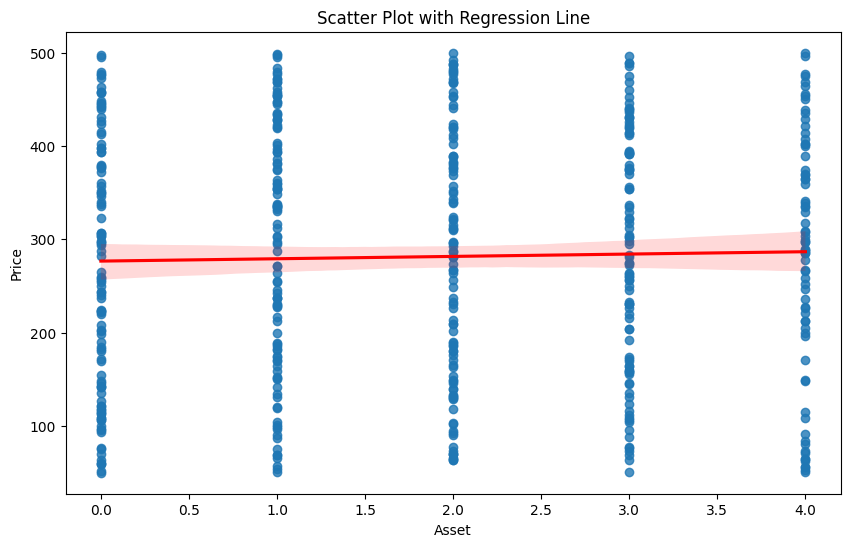

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you are using the correct column names
x = df[['Asset_Encoded']]  # Extract as Series
y = df['Price']  # Extract as Series

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, line_kws={'color': 'red'})
plt.xlabel("Asset")
plt.ylabel("Price")
plt.title('Scatter Plot with Regression Line')
plt.show()


RESIDUAL PLOT

To check the residuals of your regression model:

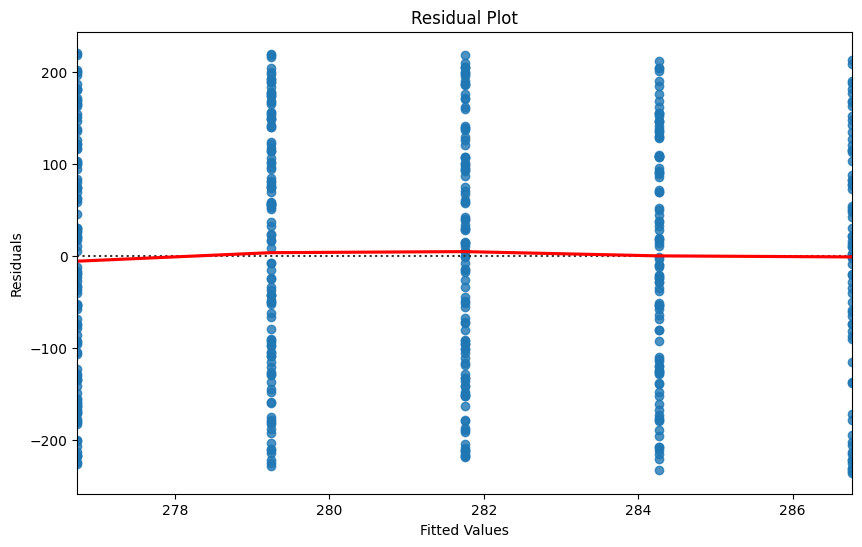

In [46]:
# Calculate residuals
residuals = model.resid

plt.figure(figsize=(10, 6))

# Residual plot
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Residuals vs. Fitted Values

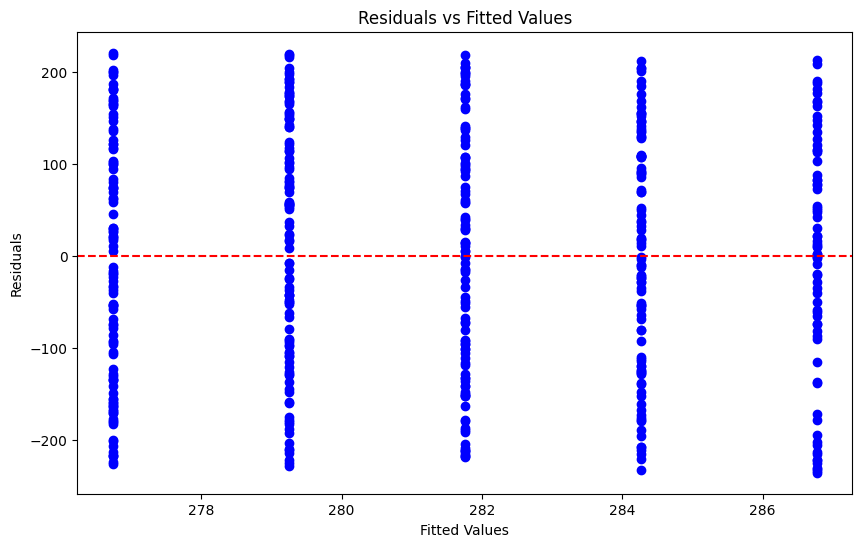

In [47]:
plt.figure(figsize=(10, 6))

# Scatter plot of residuals vs. fitted values
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
